# Linear Regression

The linear regression is the simplest way to fit a model to a set of data points, assuming that the relationship can be approximated by a simple line, i.e. y = m*x + b.

This notebook shows how to use linear regression using the Scikit-learn package and consists of two exercises
   * first, a set of artificial data is generated according to a simple straight line, i.e. y = m*x +b
   * second, we still generate data according to y = m*x + b but now generate a large sample.

In both cases, a noise term generated by a Gaussian random number is added to each point on the y-axis to randomly shift them a bit away from the "true" slope y=1.


## Imports and setup
First, we need to import the relevant packages. 
This exercise uses:
   * The Normal (Gaussian) Distribution from SciPy
   * Linear Regression from Scikit-Learn
   * Regularisation from Scikit-Learn
   
Though we still use Python 2.7 here, it is handy to import a few changes from Python 3.x to future-proof the code

In [1]:
# ensure that 1/2==0.5
from __future__ import division, print_function


%pylab inline
# large figures
rcParams['figure.figsize'] = 8, 6

# imports
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression


Populating the interactive namespace from numpy and matplotlib


# Exericse 1

In this exercise we first generate a simple sample according to y = m*x + b.
The data are evenly distributed on the x-axis.
The resulting dataset is then modelled using a linear regression.

## Load the data sample

In [2]:
!cat  ../resource/lib/publicdata/data_1.csv

In [3]:
import csv

x=[]
y=[]
line_count = 0

### BEGIN SOLUTION
with open('../resource/lib/publicdata/data_1.csv', mode='r') as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for row in csv_reader:
        if line_count==0:
            print(f'Column names are {", ".join(row)}')
        #note that rows are read as text, not numbers
        x.append(float(row['x']))
        y.append(float(row['y']))
        line_count += 1
### END SOLUTION
print(f'processed {line_count} lines')


for i,j in zip(x,y):
    print(i,j)
            
            

Column names are x, y
processed 11 lines
0.0 0.1282048247673893
1.0 0.16399208419306577
2.0 2.550826625331135
3.0 3.4213058286189986
4.0 3.2798899730457034
5.0 5.192050959766523
6.0 6.2349632255247665
7.0 7.4186899042076435
8.0 8.09062520571116
9.0 9.404002982117369
10.0 9.98284755497276


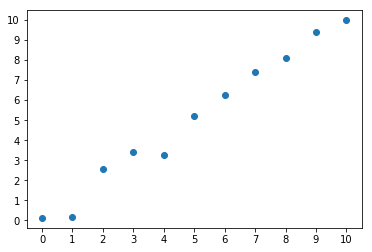

In [4]:
#show the generated sample
#plt.axis([0,10,0,10])
plt.yticks(np.arange(0,11,1))
plt.xticks(np.arange(0,11,1))
plt.plot(x,y,'o')
plt.show()

## Model the data using a linear regression

In this exercise we use the simplest model, the linear regression which is provided by the package scikit-learn.
We first instantiate an instance of the "LinearRegression" model and allow the intercept to be included in the fit.

## Exercise:
   * Perform the liniear regression using the ```LinearRegression``` method from scikit-learn
   * Print the regression coefficient you have obtained
   * Draw a scatter-plot of the artificial data and add the true linear model (according to which the artificial data was created) and the result of the linear regression.

the fitted slope is 1.035000
the fitted intercept is -0.094000


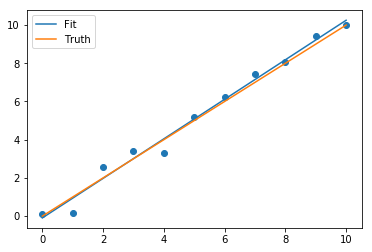

In [5]:
x=np.array(x).reshape(-1,1)

#create an instance of the LinearRegression object which will perform the fit
lm = LinearRegression(fit_intercept=True)

# now fit the data using the model
lm.fit(x,y)

# put your numbers for fitted slope and intercept here and round to 3 digits.
slope     = -999
intercept = -999

### BEGIN SOLUTION
slope = round(float(lm.coef_),3)
intercept = round(float(lm.intercept_),3)
### END SOLUTION

print("the fitted slope is %lf" % slope)
print("the fitted intercept is %lf"% intercept)

#now use the fitted model to create a line representing the fit
x_space = np.linspace(np.min(x), np.max(x))
y_pred  = lm.predict(x_space[:, np.newaxis])

#create a similar line with the original model which we have used to create the data with (without the extra noise)
true_slope = 1.0
y_true  = true_slope*x_space


plt.scatter(x,y)
plt.plot(x_space, y_pred, label='Fit')
plt.plot(x_space, y_true, label='Truth')
plt.legend()
plt.show()

In [6]:
from nose.tools import assert_equal

#here are the automated tests (hidden in student view)
### BEGIN HIDDEN TESTS
assert_equal(slope, 1.035)
assert_equal(intercept, -0.094)
### END HIDDEN TESTS